# Creating Clustering data set  
# Implementing and validating KMeans Clustering Algorithm 

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist 
from sklearn.metrics import *
import random
import matplotlib.pyplot as plt

## Creating Dataset using Using Inbuilt Function - multivariate_normal
#### For Cholesky Decomposition detailed data creation.. check the other ipython file in repository

In [2]:
Mu1= [5,6]; 
Mu2= [25,10]; 
Mu3= [15,20]; 
Sigma=2*np.eye(2) 
N=50 

clust1=pd.DataFrame(np.random.multivariate_normal(Mu1,Sigma,N),columns=['Feature1','Feature2'])
target1=pd.DataFrame(np.matlib.repmat(np.argmax([1,0,0]),N,1))
clust2=pd.DataFrame(np.random.multivariate_normal(Mu2,Sigma,N),columns=['Feature1','Feature2'])
target2=pd.DataFrame(np.matlib.repmat(np.argmax([0,1,0]),N,1))
clust3=pd.DataFrame(np.random.multivariate_normal(Mu3,Sigma,N),columns=['Feature1','Feature2'])
target3=pd.DataFrame(np.matlib.repmat(np.argmax([0,0,1]),N,1))

X=pd.concat([clust1,clust2,clust3])
Y=pd.concat([target1,target2,target3])
print(X.head(5))
print(Y.head(5))

no_of_instances = len(X.index) # number of rows
no_of_columns = len(X.columns)
np_X= X.to_numpy(copy=True)
np_Y= Y.to_numpy(copy=True)

   Feature1  Feature2
0  5.232261  4.113322
1  8.066378  6.177856
2  6.565377  5.633765
3  4.159073  6.093024
4  7.320487  6.064524
   0
0  0
1  0
2  0
3  0
4  0


In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np_X, np_Y, test_size = 0.25,random_state=42)
no_of_instances_train = Xtrain.shape[0]# number of rows
no_of_columns_train = Xtrain.shape[1]

In [4]:
def kmeans(x,k, no_of_iterations):
    np.random.seed(96)
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
        centroids = np.vstack(centroids) #Updated Centroids 
        
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,centroids

In [15]:
def find_k():
  twcss=[]
  accuracy=[]
  iterations=100
  for j in range(1,10):
    YTrain_pred,centroid=kmeans(Xtrain,j,iterations)
    acc= accuracy_score(Ytrain,YTrain_pred)
    accuracy.append(acc)
    XY_T=pd.DataFrame(Xtrain,columns=['F0','F1'])
    Y_T=pd.DataFrame(YTrain_pred,columns=['Label'])
    XY=pd.concat([XY_T, Y_T], axis=1)
    
    d={}
    for z in range(j):
      d[z] = np.array(XY[XY["Label"]==z][['F0','F1']])

    wcss=0
    for i in range(j): 
      wcss+=np.sum((d[i]-centroid[i,:])**2)                              

    twcss.append(wcss)

  return twcss,accuracy

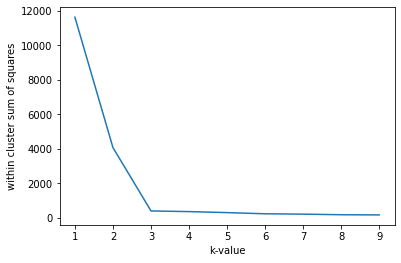

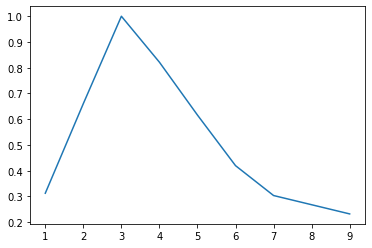

In [19]:
[twcss,accuracy]=find_k()
plt.plot(range(1,10),twcss)
plt.xlabel('k-value')
plt.ylabel('within cluster sum of squares')
plt.show()
plt.plot(range(1,10),accuracy)

In [20]:
YTrain_pred,centroid=kmeans(Xtrain,3,100)
print(accuracy_score(Ytrain,YTrain_pred))  
print(confusion_matrix(Ytrain,YTrain_pred))
print(classification_report(Ytrain,YTrain_pred))

1.0
[[35  0  0]
 [ 0 39  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        38

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [ ]:
# evaluating k-means with test data
distances = cdist(Xtest, centroid ,'euclidean')
YTest_pred = np.array([np.argmin(i) for i in distances])
print(accuracy_score(Ytest,YTest_pred))  
print(confusion_matrix(Ytest,YTest_pred))
print(classification_report(Ytest,YTest_pred))

1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



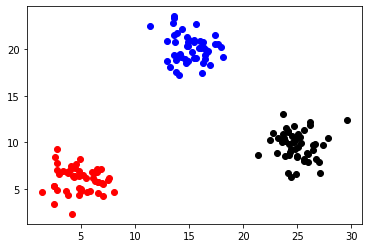

In [ ]:
plt.scatter(clust1['Feature1'],clust1['Feature2'], color = 'red')
plt.scatter(clust2['Feature1'],clust2['Feature2'], color = 'black')
plt.scatter(clust3['Feature1'],clust3['Feature2'], color = 'blue')
plt.show()

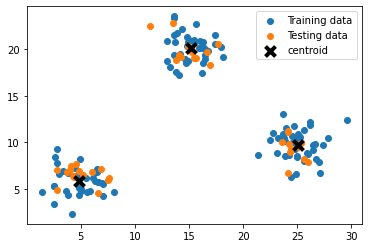

In [ ]:
plt.scatter(Xtrain[:,0],Xtrain[:,1],label='Training data')
plt.scatter(Xtest[:,0],Xtest[:,1],label='Testing data')
plt.scatter(centroid[0][0],centroid[0][1],marker='x',color='black',label='centroid',linewidth=4,s=100)
plt.scatter(centroid[1][0],centroid[1][1],marker='x',color='black',linewidth=4,s=100)
plt.scatter(centroid[2][0],centroid[2][1],marker='x',color='black',linewidth=4,s=100)
plt.legend()
plt.show()